# Clustering

In [1]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
RGCPD_func = os.path.join(main_dir, 'RGCPD')
cluster_func = os.path.join(main_dir, 'clustering')
if RGCPD_func not in sys.path:
    sys.path.append(RGCPD_func)
    sys.path.append(cluster_func)

In [2]:
%load_ext autoreload
%autoreload 2
import clustering_spatial as cl
from RGCPD import RGCPD
import plot_maps
rg = RGCPD()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing with test data


In [4]:
rg.pp_precursors()

Loaded pre-processed data of sst_test



In [5]:
rg.list_precur_pp

[('sst_test',
  '/Users/semvijverberg/surfdrive/Scripts/RGCPD/RGCPD/../data/preprocessed/sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc')]

clustering fake: 0, n_clusters: 2
clustering fake: 0, n_clusters: 3


Plotting Corr maps sst, split 0, n_clusters 2
Plotting Corr maps sst, split 0, n_clusters 3


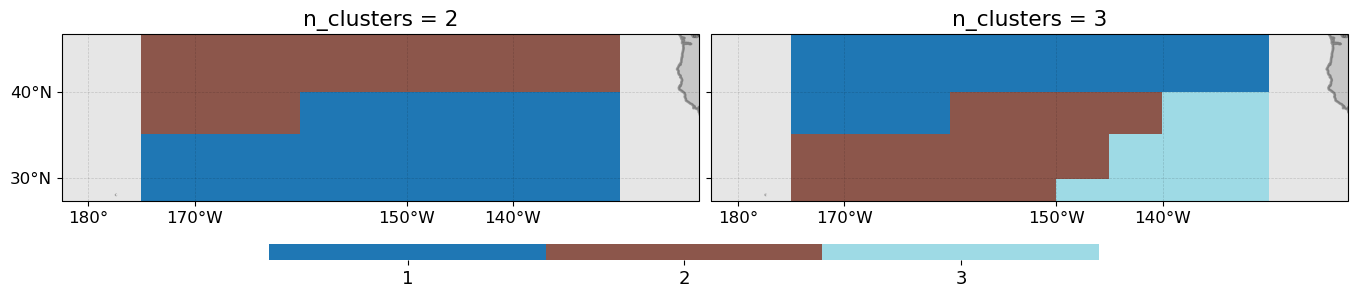

In [16]:
var_filename = rg.list_precur_pp[0][1]
mask = [185.0, 230.0, 20.0, 50.0]
q = 0.85
n_clusters = [2, 3]
xrclustered, results = cl.dendogram_clustering(var_filename, mask=mask, kwrgs_clust={'q':q, 'n_clusters':n_clusters})
fig = plot_maps.plot_labels(xrclustered, {'col_dim':'n_clusters'})

Plotting Corr maps sst, split 0, eps 90
Plotting Corr maps sst, split 0, eps 100


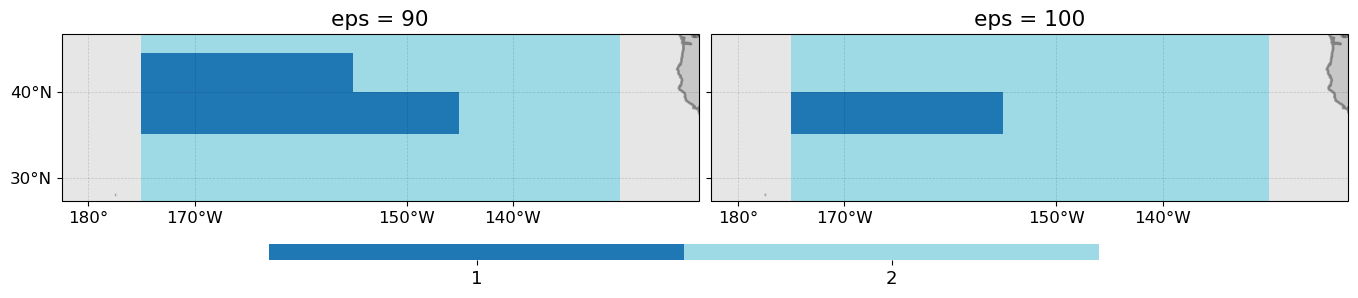

In [60]:
var_filename = rg.list_precur_pp[0][1]
mask = [185.0, 230.0, 20.0, 50.0]

xrclustered, results = cl.correlation_clustering(var_filename, mask=mask, clustermethodkey='DBSCAN', kwrgs_clust={'eps':[90, 100]})
xrclustered += 1
fig = plot_maps.plot_labels(xrclustered, {'col_dim':'eps'})



<xarray.DataArray 'sst' (eps: 2, latitude: 5, longitude: 13)>
array([[[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]],

       [[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]]])
Coordinates:
  * eps        (eps) int64 90 100
  * latitude   (latitude) float64 27.5 32.5 37.5 42.5 47.5
  * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
    mask       (latitude, longitude) bool True True True ... True True False
Attributes:
    long_name:     Sea surface temperature
    units:         K
    regridded:     bilinear_2.5d_to_5d
    is_DataArray:  1
    method:        DBSCAN
    kwrgs:         {'eps': [90, 100]}
    target:        sst
    hash:          a3926